# Support Vector Machines

## Mathematical Formulation

A support vector machine constructs a hyper-plane or set of hyper-planes in a high or infinite dimensional space, which can be used for classification or regression. Intuitively, a good separation is achieved by the hyper-plane that has the largest distance to the nearest training data points of any class (so-called functional margin), since in general the larger the margin the lower the generalization error of the classifier.

### Kernels

The kernel function can be any of the following:

- **linear** kernel defined as $\langle x, x'\rangle$;
- **polynomial** kernel defined as $(\gamma \langle x, x'\rangle + r)^d$ where $\gamma$ is specified by keyword *gamma*, $d$ by *degree* and $r$ by *coef0*;
- **rbf** (Radial Basis Function) kernel defined as $\exp(-\gamma \|x-x'\|^2)$ where $\gamma$ is specified by keyword *gamma*;
- **sigmoid** kernel defined as $\tanh(\gamma \langle x,x'\rangle + r)$ where $\gamma$ is specified by keyword *gamma* and $r$ by *coef0*.

When training a SVM with a non-linear kernel function, the parameter *gamma* can be easily automatically computed in such two ways:
- *auto* which uses 1 / (n_features * X.var()) as value of *gamma*;
- *scale* which uses 1 / n_features as value of *gamma*.

### Regularization

The parameter $C$, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low $C$ makes the decision surface smooth, while a high $C$ aims at classifying all training examples correctly. 

### Complexity

Unlike many other machine learning models, such as neural networks, the complexity of a SVM depends by the number of training examples rather than by the number of features. This is due to the core of an SVM which is essentially a quadratic programming problem (QP) and consist of separating support vectors from the rest of the training data.

### Support Vector Classifier

Given $x_i \in \mathbb{R}^p$ training vectors, $i = 1, \dots, n$, in two classes, and a vector $y \in \{+1, -1\}^n$, SVC solves the following primal problem:

$$
 \begin{align}\begin{aligned}\min_ {w, b, \zeta} \frac{1}{2} w^T w + C \sum_{i=1}^{n} \zeta_i\\\begin{split}\textrm {subject to } & y_i (w^T \phi (x_i) + b) \geq 1 - \zeta_i,\\
& \zeta_i \geq 0, i=1, ..., n\end{split}\end{aligned}\end{align}
$$

Its dual is:

$$
 \begin{align}\begin{aligned}\min_{\alpha} \frac{1}{2} \alpha^T Q \alpha - e^T \alpha\\\begin{split}
\textrm {subject to } & y^T \alpha = 0\\
& 0 \leq \alpha_i \leq C, i=1, \dots, n\end{split}\end{aligned}\end{align} 
$$

where $e$ is the vector of all ones, $C > 0$ is the upper bound, $Q$ is an $n$ by $n$ positive semidefinite matrix, $Q_{ij} = y_i y_j K(x_i, x_j)$, where $K(x_i, x_j) = \phi (x_i)^T \phi (x_j)$ is the kernel. Here training vectors are implicitly mapped into a higher (maybe infinite) dimensional space by the function $\phi$.

The decision function is:

$$
\operatorname{sgn}(\sum_{i=1}^n y_i \alpha_i K(x_i, x) + \rho)
$$

where these parameters can be accessed through the members *dual_coef_* which holds the product $y_i \alpha_i$, *support_vectors_* which holds the support vectors, and *intercept_* which holds the independent term $\rho$.

In [1]:
from ml.svm import SVC
from sklearn.svm import SVC as SKLSVC
from sklearn.model_selection import train_test_split

#### Linear Kernel

When the constraint $C$ is zero the data must be completely linearly separable and the decision boundary is referred to as *hard margin*.

##### Hard Margin

custom svc accuracy score is 1.0
custom svc found 4 support vectors from 150 examples
custom svc w is [-1.38204084  1.22251597]
custom svc b is 0.06536162377043428


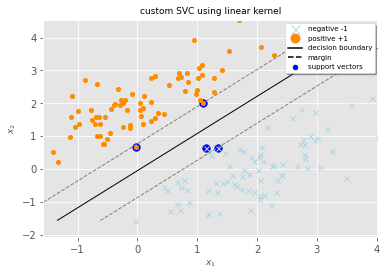

sklearn svc accuracy score is 1.0
sklearn svc found 4 support vectors from 150 examples
sklearn svc w is [[-1.3820408   1.22251573]]
sklearn svc b is [0.06536177]


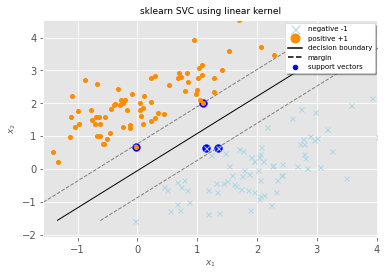

In [3]:
from utils import generate_linearly_separable_data

X, y = generate_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = SVC(kernel='linear').fit(X_train, y_train)
print(f'custom svc accuracy score is {svc.score(X_test, y_test)}')
print(f'custom svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'custom svc w is {svc.coef_}')
print(f'custom svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

svc = SKLSVC(kernel='linear').fit(X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc w is {svc.coef_}')
print(f'sklearn svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

##### Soft Margin

When the parameter $C$ is non-zero, the approach allows for some overlap in the data and the decision boundary is referred to as *soft margin*.

custom svc accuracy score is 0.96
custom svc found 16 support vectors from 150 examples
custom svc w is [-1.35906743  1.63492021]
custom svc b is -0.2863642232914556


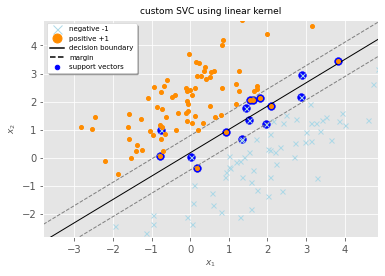

sklearn svc accuracy score is 0.96
sklearn svc found 16 support vectors from 150 examples
sklearn svc w is [[-1.35799031  1.63612311]]
sklearn svc b is [-0.28946425]


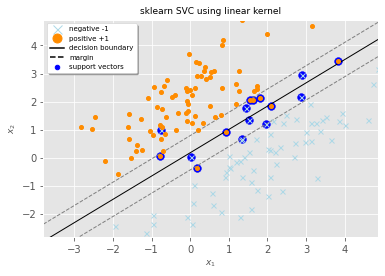

In [5]:
from utils import generate_linearly_separable_overlap_data

X, y = generate_linearly_separable_overlap_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = SVC(kernel='linear', C=10).fit(X_train, y_train)
print(f'custom svc accuracy score is {svc.score(X_test, y_test)}')
print(f'custom svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'custom svc w is {svc.coef_}')
print(f'custom svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

svc = SKLSVC(kernel='linear', C=10).fit(X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc w is {svc.coef_}')
print(f'sklearn svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

#### Polynomial Kernel

custom svc accuracy score is 0.98
custom svc found 8 support vectors from 150 examples
custom svc b is -0.3089331581891753


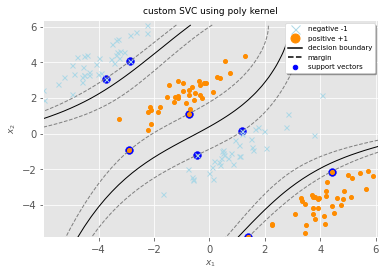

sklearn svc accuracy score is 0.98
sklearn svc found 8 support vectors from 150 examples
sklearn svc b is [-0.309096]


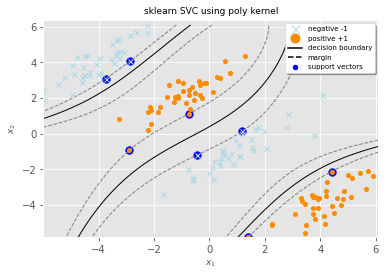

In [6]:
from utils import generate_non_linearly_separable_data

X, y = generate_non_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = SVC(kernel='poly', degree=3., coef0=3, gamma='auto').fit(X_train, y_train)
print(f'custom svc accuracy score is {svc.score(X_test, y_test)}')
print(f'custom svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'custom svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

svc = SKLSVC(kernel='poly', degree=3., coef0=3., gamma='auto').fit(X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

#### RBF Kernel

custom svc accuracy score is 1.0
custom svc found 39 support vectors from 150 examples
custom svc b is 0.020434817243631546


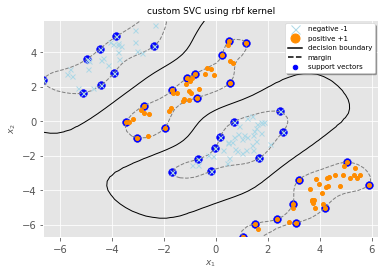

sklearn svc accuracy score is 1.0
sklearn svc found 39 support vectors from 150 examples
sklearn svc b is [0.02041986]


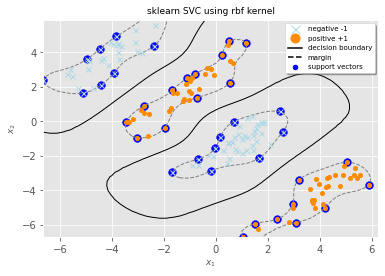

In [7]:
from utils import generate_non_linearly_separable_data

X, y = generate_non_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = SVC(kernel='rbf', gamma='auto').fit(X_train, y_train)
print(f'custom svc accuracy score is {svc.score(X_test, y_test)}')
print(f'custom svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'custom svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

svc = SKLSVC(kernel='rbf', gamma='auto').fit(X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc b is {svc.intercept_}')
SVC.plot(svc, X_train, y_train)

### Support Vector Regression

Given $x_i \in \mathbb{R}^p$ training vectors, $i = 1, \dots, n$, and a vector $y \in \mathbb{R}^n$, $\varepsilon$-SVR solves the following primal problem:

$$
 \begin{align}\begin{aligned}\min_ {w, b, \zeta, \zeta^*} \frac{1}{2} w^T w + C \sum_{i=1}^{n} (\zeta_i + \zeta_i^*)\\\begin{split}\textrm {subject to } & y_i - w^T \phi (x_i) - b \leq \varepsilon + \zeta_i,\\
                      & w^T \phi (x_i) + b - y_i \leq \varepsilon + \zeta_i^*,\\
                      & \zeta_i, \zeta_i^* \geq 0, i=1, ..., n\end{split}\end{aligned}\end{align} 
$$

Its dual is:

$$
 \begin{align}\begin{aligned}\min_{\alpha, \alpha^*} \frac{1}{2} (\alpha - \alpha^*)^T Q (\alpha - \alpha^*) + \varepsilon e^T (\alpha + \alpha^*) - y^T (\alpha - \alpha^*)\\\begin{split}
\textrm {subject to } & e^T (\alpha - \alpha^*) = 0\\
& 0 \leq \alpha_i, \alpha_i^* \leq C, i=1, \dots, n\end{split}\end{aligned}\end{align}
$$

where $e$ is the vector of all ones, $C > 0$ is the upper bound, $Q$ is an $n$ by $n$ positive semidefinite matrix, $Q_{ij} = K(x_i, x_j)$, where $K(x_i, x_j) = \phi (x_i)^T \phi (x_j)$ is the kernel. Here training vectors are implicitly mapped into a higher (maybe infinite) dimensional space by the function $\phi$.

The decision function is:

$$
\sum_{i=1}^n (\alpha_i - \alpha_i^*) K(x_i, x) + \rho
$$

where these parameters can be accessed through the members *dual_coef_* which holds the difference $\alpha_i - \alpha_i^*$, *support_vectors_* which holds the support vectors, and *intercept_* which holds the independent term $\rho$.

In [8]:
from ml.svm import SVR
from sklearn.svm import SVR as SKLSVR
from sklearn.model_selection import train_test_split

In [9]:
from utils import generate_non_linearly_regression_data

X, y = generate_non_linearly_regression_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svr = SVR(kernel='rbf', gamma='auto').fit(X_train, y_train)
print(f'custom svr r2 score is {svr.score(X_test, y_test)}')
print(f'custom svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'custom svr b is {svr.intercept_}')
SVR.plot(svr, X_train, y_train)

svr = SKLSVR(kernel='rbf', gamma='auto').fit(X_train, y_train)
print(f'sklearn svr r2 score is {svr.score(X_test, y_test)}')
print(f'sklearn svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svr b is {svr.intercept_}')
SVR.plot(svr, X_train, y_train)

Exception: the index could not be found